In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y = pd.read_csv('../data/processed/y_train.csv').squeeze()


print(X.shape, X_test.shape, y.shape)

(614, 16) (367, 16) (614,)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)


print(X_train.shape, X_val.shape)

(491, 16) (123, 16)


In [4]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_lr = log_reg.predict(X_val)
y_prob_lr = log_reg.predict_proba(X_val)[:,1]

In [5]:
print('Accuracy:', accuracy_score(y_val, y_pred_lr))
print('Precision:', precision_score(y_val, y_pred_lr))
print('Recall:', recall_score(y_val, y_pred_lr))
print('F1:', f1_score(y_val, y_pred_lr))
print('ROC-AUC:', roc_auc_score(y_val, y_prob_lr))

Accuracy: 0.8536585365853658
Precision: 0.8316831683168316
Recall: 0.9882352941176471
F1: 0.9032258064516129
ROC-AUC: 0.8715170278637772


In [6]:
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



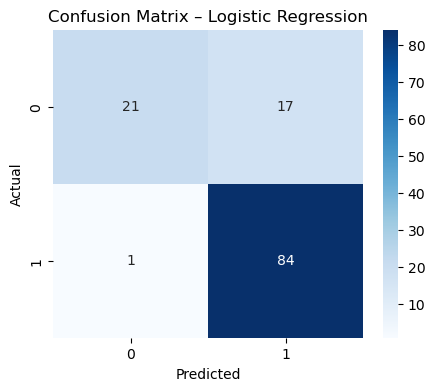

In [7]:
cm = confusion_matrix(y_val, y_pred_lr)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
n_estimators=200,
random_state=42,
class_weight='balanced'
)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:,1]

In [9]:
print('Accuracy:', accuracy_score(y_val, y_pred_rf))
print('Precision:', precision_score(y_val, y_pred_rf))
print('Recall:', recall_score(y_val, y_pred_rf))
print('F1:', f1_score(y_val, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_val, y_prob_rf))

Accuracy: 0.8617886178861789
Precision: 0.8617021276595744
Recall: 0.9529411764705882
F1: 0.9050279329608939
ROC-AUC: 0.8475232198142414


In [10]:
results = pd.DataFrame({
'Model': ['Logistic Regression', 'Random Forest'],
'Accuracy': [
accuracy_score(y_val, y_pred_lr),
accuracy_score(y_val, y_pred_rf)
],
'F1 Score': [
f1_score(y_val, y_pred_lr),
f1_score(y_val, y_pred_rf)
],
'ROC-AUC': [
roc_auc_score(y_val, y_prob_lr),
roc_auc_score(y_val, y_prob_rf)
]
})


results

,Model,Accuracy,F1 Score,ROC-AUC
0,Logistic Regression,0.853659,0.903226,0.871517
1,Random Forest,0.861789,0.905028,0.847523


In [11]:
cv_scores = cross_val_score(
rf, X, y, cv=5, scoring='roc_auc'
)


print('CV ROC-AUC Scores:', cv_scores)
print('Mean ROC-AUC:', cv_scores.mean())

CV ROC-AUC Scores: [0.77244582 0.7371517  0.80006105 0.80006105 0.75783208]
Mean ROC-AUC: 0.7735103407084831
